In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
    
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_eth = pd.read_csv("/dataset/ETH.csv")
df_btc = pd.read_csv("/dataset/BTC.csv")

Read the csv files that hold the data for this Notebook

In [3]:
df = pd.merge(df_btc, df_eth, on="date", suffixes=("_btc", "_eth"))

df = df.iloc[-100:]

This merges my dataframes.  I didn't like look at them in seperate reports.  Because they share identical data headers it was easy to align them.

df.iloc keeps the data to the most recent 100 data points.  This is a very large list of data and it was annoying for all of it to print everytime.

In [4]:
df.describe()

,open_btc,high_btc,low_btc,close_btc,open_eth,high_eth,low_eth,close_eth
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,97191.244000,98724.751000,95782.751000,97421.665000,2164.766600,2230.508600,2103.748400,2169.741400
std,9982.772101,9840.075154,10084.324184,9942.446434,401.257493,412.541635,394.263947,402.225411
min,77036.800000,80822.500000,74437.400000,77017.600000,1476.270000,1587.950000,1386.540000,1475.810000
25%,85364.925000,88080.000000,84598.225000,86460.675000,1801.867500,1835.217500,1764.225000,1801.827500
50%,102016.500000,104083.500000,100298.000000,102634.000000,2309.945000,2449.455000,2213.110000,2340.310000
75%,105472.250000,106541.250000,104207.500000,105563.250000,2531.217500,2587.370000,2468.730000,2530.372500
max,110891.000000,111984.000000,108424.000000,110876.000000,2782.700000,2879.580000,2755.050000,2783.720000


This shows the statistical description of the dataframes.

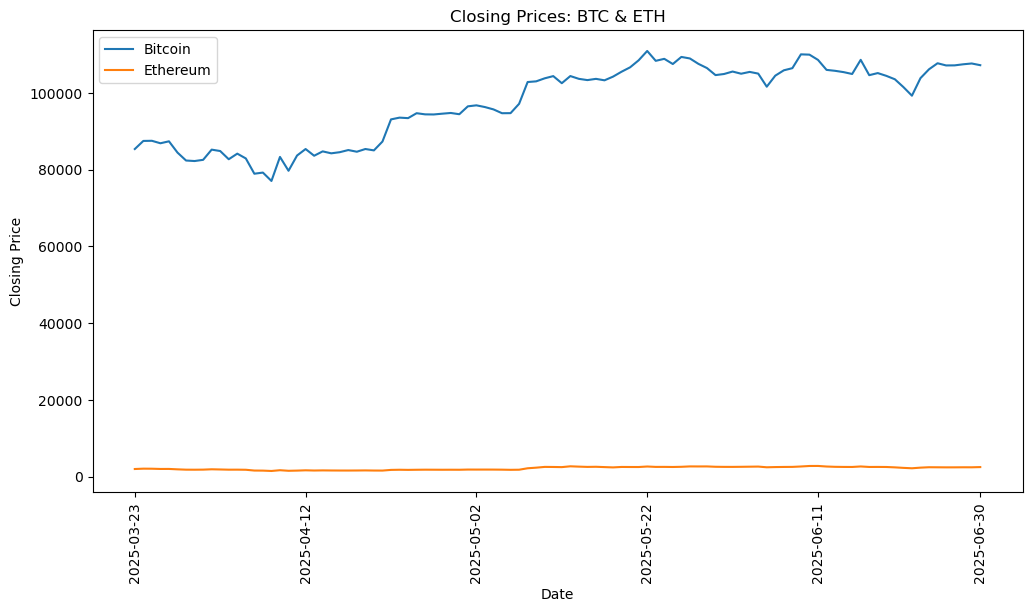

In [5]:
tick_intervals = [0, 20, 40, 60, 80, 99]

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close_btc', data=df, label='Bitcoin')
sns.lineplot(x='date', y='close_eth', data=df, label='Ethereum')
plt.title('Closing Prices: BTC & ETH')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)

plt.xticks(tick_intervals)

plt.show()



This line plot shows the closign prices of BTC and ETH 

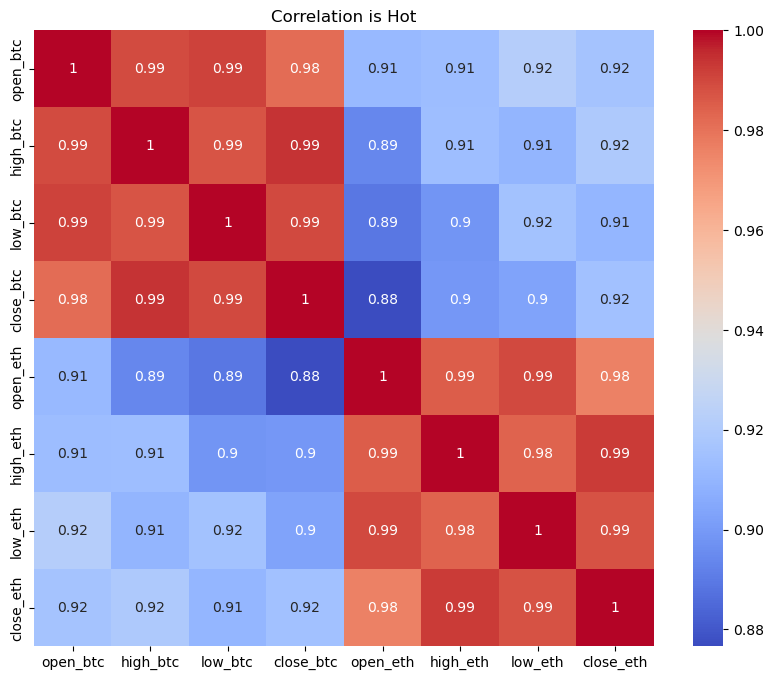

In [6]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation is Hot')
plt.show()

This heatmap shows the correlation between BTC and ETH closing prices.  As you can see, they don't have a very high correlation.

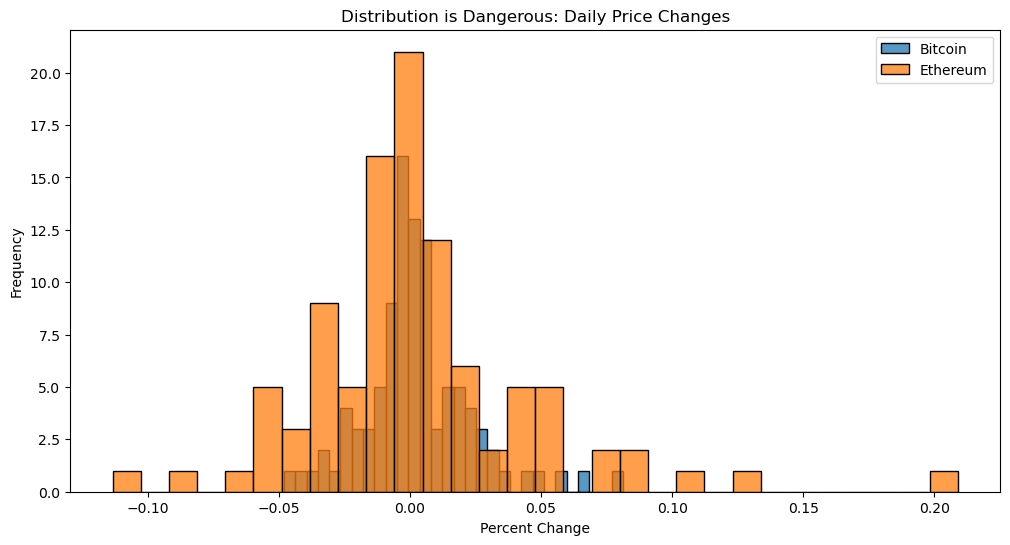

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['close_btc'].pct_change().dropna(), bins=30, label='Bitcoin')
sns.histplot(df['close_eth'].pct_change().dropna(), bins=30, label='Ethereum')
plt.title('Distribution is Dangerous: Daily Price Changes')
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

A surprisingly normal distribution of closing price fluctuation for both BTC and ETH.  The histogram has stacked one on top of the other for easy comparison.

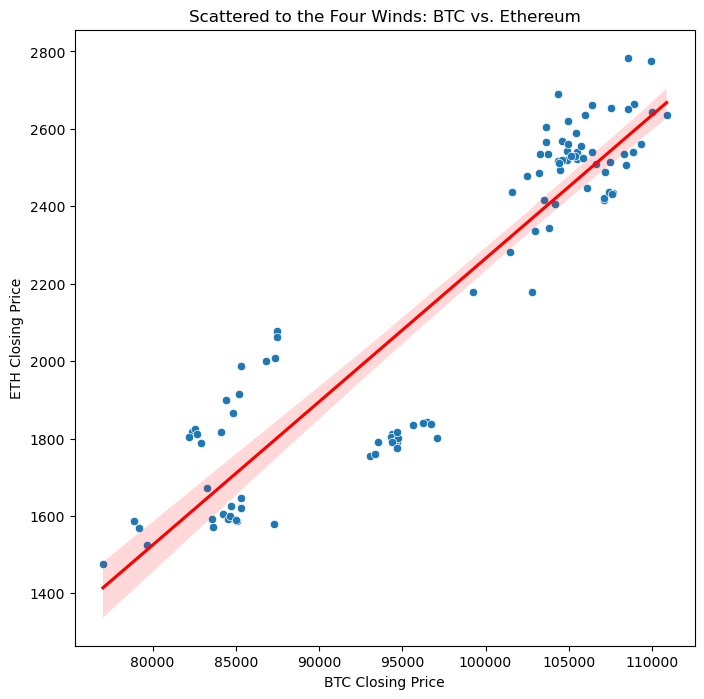

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='close_btc', y='close_eth', data=df)
sns.regplot(x='close_btc', y='close_eth', data=df, scatter=False, color='red')
plt.title('Scattered to the Four Winds: BTC vs. Ethereum')
plt.xlabel('BTC Closing Price')
plt.ylabel('ETH Closing Price')
plt.show()

Each point on the scatterplot represents a closing price for BTC and ETH.  This is not a tight scatter.  While the distribution of the histogram is normal we can see that the main correlation between BTC and ETH is market value.  They don't seem to be highly correlated on individual price.